Exercise 1:

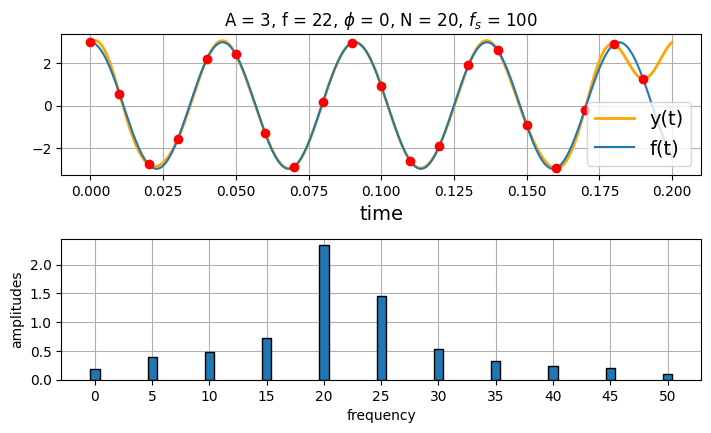

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 3  # Amplitude
f = 22  # Frequency in Hz
phi = 0 # Phase angle in radians
N = 20  # Number of samples
fs = 100  # Sampling frequency in Hz

n = np.arange(0, N)
ts = n / fs

f0 = fs / N
T = 1 / f0
t = np.linspace(0, T, 200000)

signal = A * np.cos(2 * pi * f * ts + phi)

t_2 = np.linspace(0, T, 20000)
signal_2 = A * np.cos(2 * np.pi * f * t_2 + phi)


#########

M = int(N / 2)

a0 = 1 / N * np.sum(signal)
a = np.zeros(M)
b = np.zeros(M)

from numpy import cos, sin, pi
for k in range(1,M):
    a[k-1]=2/N*np.sum(signal*cos(2*pi*k*n/N))
    b[k-1]=2/N*np.sum(signal*sin(2*pi*k*n/N))

a[M-1]=1/N*np.sum(signal*cos(2*pi*M*n/N))
b[M-1]=1/N*np.sum(signal*sin(2*pi*M*n/N))

A_dft = np.sqrt(a**2+b**2) #amplitudes
phi_dft = np.arctan2(-b,a) #phase angles

f_dft=np.arange(f0,(M+1)*f0,f0) #frequencies

plt.figure(figsize=(7,4))

yt=a0
for k in range(M):
    yt=yt+A_dft[k]*cos(2*pi*f_dft[k]*t+phi_dft[k])

# Plot the signal f(t)
plt.subplot(211)

plt.plot(t, yt,'orange', label = 'y(t)',lw=2)

plt.plot(t_2, signal_2, label='f(t)')

plt.legend(fontsize = 14)
plt.xlabel('time',fontsize=14)
plt.title('A = ' + str(A) + ', f = '+ str(f) + ', $\phi$ = '+str(phi) + ', N = ' + str(N)+ ', $f_s$ = '+ str(fs))

plt.plot(ts, signal, 'ro')

# Plot the samples

plt.grid(True)

plt.tight_layout()
plt.subplot(212)
plt.bar(np.hstack((0,f_dft)),np.hstack((a0,A_dft)),edgecolor='k',zorder=2)
plt.grid()
plt.xticks(np.hstack((0,f_dft)))
plt.xlabel("frequency")
plt.ylabel("amplitudes")
plt.show()

plt.show()


Exercise 2:

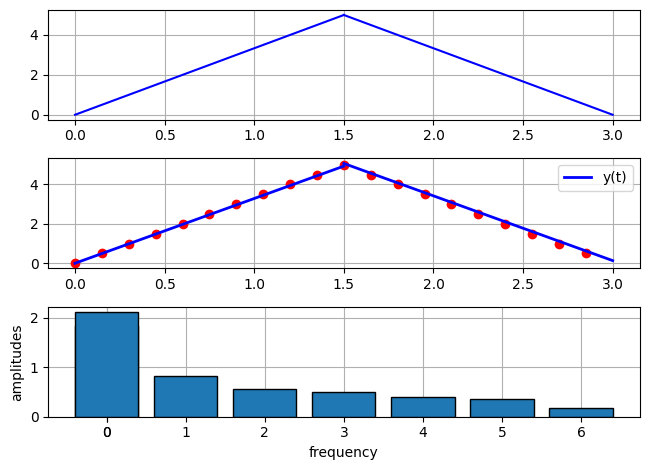

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

U = 5
T = 3
N = 20

fs = N / T

f0 = fs / N
T_1 = 1 / f0
f = np.array([0, 1, 2, 3, 4, 5, 6])
time = np.linspace(0, T_1 / 2, 20000)
line = time * (U) / (T_1 / 2)

time_1 = np.linspace(T_1 / 2, T_1, 20000)
line_1 = U * 2 - time_1 * (U) / (T_1 / 2)

#########

n = np.arange(0, N / 2 + 1)
ts = n / fs
signal = ts * (U) / (T / 2)


n_2 = np.arange(N / 2 + 1, N)
ts_2 = n_2 / fs
signal_2 = U * 2 - ts_2 * (U) / (T / 2)

########

N_1 = N * 3 / 4

M_1 = int(N_1 / 2)

a_1 = np.zeros(M_1)
b_1 = np.zeros(M_1)

a0 = 1 / N_1 * np.sum(signal)

from numpy import cos, sin, pi
for k in range(1,M_1):
    a_1[k-1]=2/N_1*np.sum(signal*cos(2*pi*k*n/N_1))
    b_1[k-1]=2/N_1*np.sum(signal*sin(2*pi*k*n/N_1))

a_1[M_1-1]=1/N_1*np.sum(signal*cos(2*pi*M_1*n/N_1))
b_1[M_1-1]=1/N_1*np.sum(signal*sin(2*pi*M_1*n/N_1))

A_dft_1 = np.sqrt(a_1**2+b_1**2) #amplitudes

yt_1=0

for k in range(M_1):
    yt_1 = yt_1 + time * A_dft_1[k] / (T / 2)


####

N_2 = N * 3 / 4

M_2 = int(N_2 / 2)

a_2 = np.zeros(M_2)
b_2 = np.zeros(M_2)

from numpy import cos, sin, pi
for k in range(1,M_2):
    a_2[k-1]=2/N_2*np.sum(signal*cos(2*pi*k*n/N_2))
    b_2[k-1]=2/N_2*np.sum(signal*sin(2*pi*k*n/N_2))

a_2[M_2-1]=1/N_2*np.sum(signal*cos(2*pi*M_2*n/N_2))
b_2[M_2-1]=1/N_2*np.sum(signal*sin(2*pi*M_2*n/N_2))

A_dft_2 = np.sqrt(a_2**2+b_2**2) #amplitudes

yt_2=0

for k in range(M_1):
    yt_2 = yt_2 + time_1 * A_dft_2[k] / (T / 2)

yt_2 = 10 - yt_2


plt.subplot(311)

plt.plot(time, line, 'blue')
plt.plot(time_1, line_1, 'blue')
plt.grid()


plt.subplot(312)
plt.plot(ts, signal, 'ro')
plt.plot(ts_2, signal_2, 'ro')
plt.plot(time, yt_1,'blue', label = 'y(t)',lw=2)
plt.plot(time_1, yt_2,'blue',lw=2)
plt.legend()
# Plot the samples

plt.grid()

plt.subplot(313)
plt.bar(np.hstack((0,f)),np.hstack((a0,A_dft_1)),edgecolor='k',zorder=2)
plt.grid()
plt.xticks(np.hstack((0,f)))
plt.xlabel("frequency")

plt.tight_layout()

plt.ylabel("amplitudes")
plt.show()

